# Probability fundamentals
Probability theory is a mathematical framework for representing uncertain statements. In artificial intelligence applications, we use probability theory in two major ways:
* The laws of probability tell us how AI systems should reason, so we design our algorithms to compute or approximate various expressions derived using probability theory.
* We can use probability and statistics to theoretically analyze the behavior of proposed AI systems.

Unlike the world of computer scientists and software engineers where things are entirely deterministic and certain, the world of machine learning must always deal with uncertain quantities and sometimes stochastic (non-deterministic or randomly determined) quantities.

There are three possible sources of uncertainty:
* __Inherent stochasticity__: These are systems that have inherent randomness. Like using the python `rand()` function which outputs random numbers each time you run, or the dynamics of subatomic particles in quantum mechanics which are described as probabilistic in quantum mechanics.
* __Incomplete observability__: The best example for this is the [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) - there are three doors and there's a ferrari behind one door and the other two lead to a goat. Even though the contestant's choice is deterministic, from the contestant's point of view the outcome is uncertain and deterministic systems appear to be stochastic when you can't observe all the variables.
* __Incomplete modeling__: When we discard some information about the model the discarded information results in an uncertainty in the model's predictions.

<img src="images/strange.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

When Dr. Strange said we have 1 in 14 million chances of winning the war, he practically saw those 14 million futures, this is called __frequentist probability__, which defines an event's probability as the limit of its relative frequency in a large number of trials. But not always do we have Dr. Strange's time stone to see all the possible futures or events that are repeatable, in this case we turn to __Bayesian probability__, which uses probability to represent a degree of belief for certain events, with 1 indicating absolute certainty and 0 indicating absolute uncertainty.

Even though the frequentist probability is related to rates at which events occur and Bayesian probability is related to qualitative levels of certainty, we treat both of them as behaving the same and we use the exact same formulas to compute the probability of events.

In [1]:
%%capture
%pip install scipy numpy matplotlib seaborn

In [2]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction to probability theory
### Events and Sample Spaces

Let's assume we have a fair coin, which is equally likely to come up heads (H) or tails (T).

In instances like this, where the two outcomes are equally likely, we can use probability theory to express the likelihood of a particular __event__ by comparing it with the __sample space__ (the set of all possible outcomes, can be denoted as $\Omega$):

$$P(\text{event}) = \frac{\text{\char"0023 of outcomes of event}}{\text{\char"0023 of outcomes in }\Omega}$$

If we're only flipping the coin once, then there are only `2` possible outcomes in the sample space $\Omega$: it will either be H or T (using set notation, we could write this as $\Omega$ = {H, T}).

Therefore:

$$ P(H) = \frac{1}{2} = 0.5 $$

Equally:

$$ P(T) = \frac{1}{2} = 0.5 $$

As a separate example, consider drawing a single card from a standard deck of 52 playing cards. In this case, the number of possible outcomes in the sample space $\Omega$ is `52`.

There is only one ace of spades in the deck, so the probability of drawing it is: $$ P(\text{ace of spades}) = \frac{1}{52} \approx 0.019 $$

In contrast there are four aces, so the probability of drawing an ace is: $P(\text{ace}) = \frac{4}{52} \approx 0.077$

Some additional examples:

$$ P(\text{spade}) = \frac{13}{52} = 0.25 $$

$$ P(\text{ace OR spade}) = \frac{16}{52} \approx 0.307 $$

$$ P(\text{card}) = \frac{52}{52} = 1 $$

$$ P(\text{dog}) = \frac{0}{52} = 0 $$

### Multiple Independent Observations
Let's return to coin flipping to illustrate situations where we have an event consisting of multiple independent observations. For example, the probability of throwing two consecutive heads is: $$ P(\text{HH}) = \frac{1}{4} = 0.25 $$ ...because there is one HH event in the sample set of four possible events ($\Omega$ = {HH, HT, TH, TT}).

Likewise, the probability of throwing *three* consecutive heads is: $$ P(\text{HHH}) = \frac{1}{8} = 0.125 $$ ...because there is one HHH event in the sample set of eight possible events ($\Omega$ = {HHH, HHT, HTH, THH, HTT, THT, TTH, TTT}).

As final examples, the probability of throwing exactly two heads in three tosses is $ P = \frac{3}{8} = 0.375 $ while the probability of throwing at least two heads in three tosses is $ P = \frac{4}{8} = 0.5 $.

### Combining Probabilities
In order to combine probabilities, we can multiply them. So the probability of throwing five consecutive heads, for example, is the product of probabilities we've already calculated: $$ P(\text{HHHHH}) = P(\text{HH}) \times P(\text{HHH}) = \frac{1}{4} \times \frac{1}{8} = \frac{1}{32} \approx 0.031 $$

### Conditional Probability
In many cases, we are interested in the probability of some event, given that some other event has happened. This is called a __conditional probability__. We denote the conditional probability that $\mathrm{y} = y$ given  $\mathrm{x} = x$ as:

$$P(\mathrm{x} = x \ | \ \mathrm{y} = y) = \frac{P(\mathrm{x} = x, \mathrm{y} = y)}{P(\mathrm{y} = y)} $$

This can be really useful on uncertain events, for example, if I ask you, do you think I walk to work? By now you should say something along, 40% chance or some arbitrary number that I walk to work, but if I give you additional information like say i live 10 minutes walking distance from work, then the probability of me walking to work got higher, this can happen the other way too, if I say I am 1 hour walking distance from work, then probability of me walking to work will get small. This is conditional probability. You will word it as "probability of me walking to work given I live 10 minutes from work".

The conditional probability can also be given in terms of sets as below:

$$P(\mathrm{x} = x \ | \ \mathrm{y} = y) = \frac{P( x \cap y)}{P(y)} $$

This can be illustrated as below:

<img src="images/condprob.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="30%">

Joint probability ($P( x \cap y)$) is a probability of both event `A` __and__ event `B` occurring. For example, we draw a card and want to know the probability of it being four and red. There are two red fours in a deck of 52, the 4 of hearts and the 4 of diamonds, therefore:

$$P( \text{red} \cap \text{four}) = \frac{2}{52} = \frac{1}{26}$$

For conditional probability, if you know you have drawn a red card what are the probability of it being a four. Half of the cards are red and in those red card we have 2 fours:

$$P(\text{red}) = \frac{26}{52} = \frac{1}{2}$$

So, our result is:

$$P(\text{four} | \text{red}) = \frac{\frac{1}{26}}{\frac{1}{2}} = \frac{1}{13}$$


### Combinatorics
*Combinatorics* is a field of mathematics devoted to counting that can be helpful to studying probabilities. We can use **factorials** (e.g., $4! = 4 \times 3 \times 2 \times 1 = 24$), which feature prominently in combinatorics, to calculate probabilities instead of painstakingly determining all of the members of the sample space $\Omega$ and counting subsets within $\Omega$. 

More specifically, we can calculate the number of outcomes of an event using the "number of combinations" equation: $$ {n \choose k} = \frac{n!}{k!(n - k)!} $$

The left-hand side of the equation is read "$n$ choose $k$" and is most quickly understood via an example: If we have three coin flips, $n = 3$, and if we're interested in the number of ways to get two head flips (or two tail flips, for that matter), $k = 2$. We would read this as "3 choose 2" and calculate it as:
$$ {n \choose k} = {3 \choose 2} = \frac{3!}{2!(3 - 2)!} = \frac{3!}{(2!)(1!)} = \frac{3 \times 2 \times 1}{(2 \times 1)(1)} = \frac{6}{(2)(1)} = \frac{6}{2} = 3 $$

This provide us with the numerator for event-probability equation from above: $$P(\text{event}) = \frac{\text{\char"0023 of outcomes of event}}{\text{\char"0023 of outcomes in }\Omega}$$

In the case of coin-flipping (or any binary process with equally probable outcomes), the denominator can be calculated with $2^n$ (where $n$ is again the number of coin flips), so: $$\frac{\text{\char"0023 of outcomes of event}}{\text{\char"0023 of outcomes in }\Omega} = \frac{3}{2^n} = \frac{3}{2^3} = \frac{3}{8} = 0.375$$

## The Law of Large Numbers
While a fair coin should land heads up 50% of the time, as we've seen above, with small sample sizes, there is a non-trivial possibility that in a given experiment we could flip heads on all of the tosses. For example, we've calculated that there's a 3.1% chance that we'll get heads on every toss in a small five-toss experiment. 

> The **law of large numbers** states that the more experiments we run, the closer we will tend to get to the expected probability. 

Let's run some code to examine this in practice. To start, we'll create a vector of exponentially increasing $n$umbers of coin tosses per experiment: 

In [3]:
ns = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
np.random.seed(42) # for reproducibility

We will discuss the binomial distribution later. For now it suffices to think of its two arguments as *number of coin flips in experiment* and *probability of heads*, while it returns the number of flips that are heads in the experiment.

In [4]:
np.random.binomial(1, 0.5)

0

In [5]:
heads_count = [np.random.binomial(n, 0.5) for n in ns]
heads_count

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [6]:
proportion_heads = heads_count/ns
proportion_heads

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

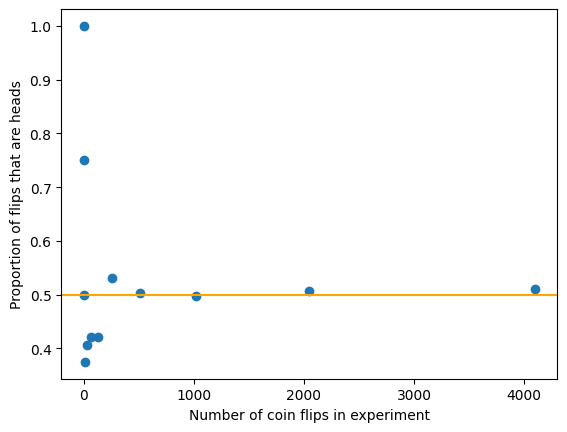

In [7]:
fig, ax = plt.subplots()
plt.xlabel('Number of coin flips in experiment')
plt.ylabel('Proportion of flips that are heads')
plt.axhline(0.5, color='orange')
ax.scatter(ns, proportion_heads);

It is important at this juncture to address the **gambler's fallacy**. It is a common misconception that the law of large numbers dictates that if, say, five heads have been flipped in a row, then the probability of tails is higher on the sixth flip. In fact, probability theory holds that each coin flip is completely independent of all others. Thus, every single flip of a fair coin has a 50% chance of being heads, no matter what happened on preceding flips.

> Example: roulette tables at casinos often have prominent displays tracking the history of red versus black even though there's a 47.4% chance of each on every spin of the roulette wheel no matter what happened on preceding spins. Gamblers will note, say, five reds in a row at a given table and flock to it to bet on black.

# Statistics introduction
The field of statistics applies probability theory to make inferences with a quantifiable degree of confidence. Before we dive deeper, let's discuss some basic terminology.

A __population__ is the entire group that you want to draw conclusions about.

A __sample__ is the specific group that you will collect data from. The size of the sample is always less than the total size of the population.

In research, a population doesn’t always refer to people. It can mean a group containing elements of anything you want to study, such as objects, events, organizations, countries, species, organisms, etc.

<img src="images/pop-samp.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="50%">

For example, let's say we ran the five-coin-flip experiment 1000 times with a fair coin: 

In [8]:
n_experiments = 1000
heads_count = np.random.binomial(5, 0.5, n_experiments)

We can plot the results of our experiment to create a **probability distribution**: 

In [9]:
heads, event_count = np.unique(heads_count, return_counts=True)
event_prob = event_count/n_experiments
print(heads)
print(event_count)
print(event_prob)

[0 1 2 3 4 5]
[ 33 181 285 313 160  28]
[0.033 0.181 0.285 0.313 0.16  0.028]


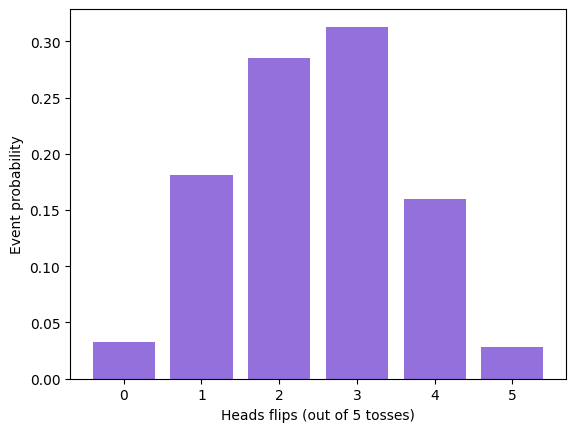

In [10]:
plt.bar(heads, event_prob, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
plt.ylabel('Event probability');

Let's say we'd like to now test a coin as to whether it's fair or not. We flip it five times and all five times it comes up heads. Does this imply it's not a fair coin? Statistics arms us with tools to use the probability distribution above to answer this question with a particular degree of confidence. 

## Measures of Central Tendency
Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

### Expected Value
In probability theory, the __expected value__ is a generalization of the weighted average. Informally, the expected value is the arithmetic mean of a large number of independently selected outcomes of a random variable. Since it is obtained through arithmetic, the expected value sometimes may not even be included in the sample data set; it is not the value you would _expect_ to get in reality.

The expected value of a random variable with a finite number of outcomes is a weighted average of all possible outcomes:
$$ \mathbb{E} = \sum_x xP(x) $$

For continuous variables, it is computed with an integral:
$$\mathbb{E} = \int xP(x) dx $$

In [11]:
from math import factorial

def coinflip_prob(n, k):
    n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
    return n_choose_k/2**n

P = [coinflip_prob(5, x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

In [12]:
E = sum([P[x]*x for x in range(6)])
E

2.5

### Mean
The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):
$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

Expected value is in fact the long-term *mean* of some function (i.e., $\mu = \mathbb{E}$). Let's calculate how close the sample mean, $\bar{x}$, of our five-coin-flip experiments comes to the expected value, $\mathbb{E} = 2.5$.

In [13]:
len(heads_count)

1000

In [14]:
heads_count[0:20]

array([2, 2, 2, 3, 2, 3, 3, 1, 3, 1, 1, 4, 4, 3, 2, 1, 3, 2, 1, 2])

In [15]:
sum(heads_count)/len(heads_count)

2.47

NumPy comes with a built-in function:

In [16]:
np.mean(heads_count)

2.47

In [17]:
heads_count.mean()

2.47

Pretty close! The law of large numbers implies that as we increase the number of experiments (e.g., to a million -- you're welcome to try it), we'll converge on $\mathbb{E}=2.5$.

### Median
The second most common measure of central tendency is the **median**, the midpoint value in the distribution:

In [18]:
heads_count.sort()
heads_count[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
heads_count[-20:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [20]:
len(heads_count)

1000

With an odd number of values in a distribution, we consider the single midpoint to be the median, e.g., the midpoint of the sorted array `[2, 4, 6, 9, 10]` is six.

With an even number, we take the mean of the two values that straddle the midpoint: 

In [21]:
heads_count[499]

3

In [22]:
heads_count[500]

3

...which in this case is obviously three:

In [23]:
(3+3)/2

3.0

Built-in method:

In [24]:
np.median(heads_count)

3.0

### Mode
The **mode** is the final common measure of central tendency. It is simply the value in the distribution that occurs most frequently.

As is clear in the most recently output chart, in the case of our five-coin-toss experiment, the mode is three.

Method available in the SciPy `stats` module:

In [25]:
st.mode(heads_count)

ModeResult(mode=3, count=313)

With small sample sizes, the mean typically provides the most accurate measure of central tendency.

With larger sample sizes, the mean, median, and mode will tend to coincide, as long as the distribution isn't skewed: 

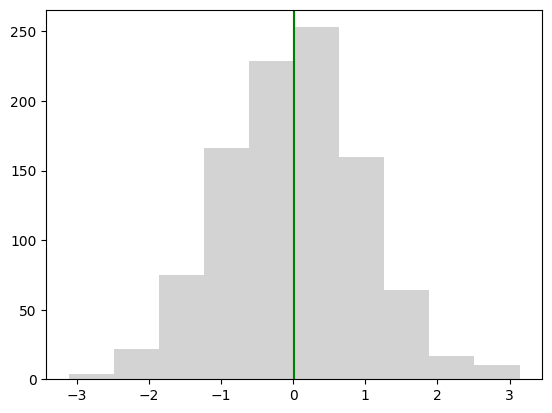

In [26]:
x = st.skewnorm.rvs(0, size=1000) # first argument is "skewness"; 0 has no skew

fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
plt.hist(x, color = 'lightgray');
# Note: Mode typically only applies to PMFs; this is a PDF

Skewed distributions, in contrast, drag the mean away from the center and toward the tail: 

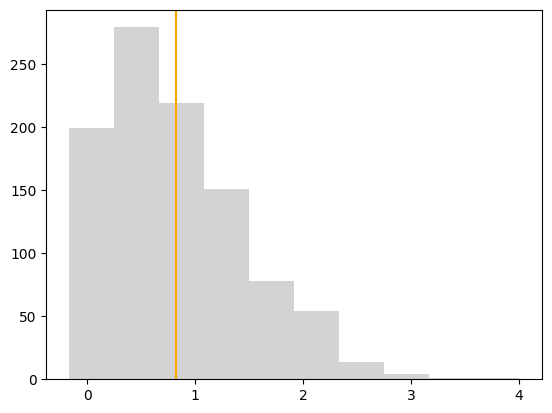

In [27]:
x = st.skewnorm.rvs(10, size=1000)

fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.hist(x, color = 'lightgray');

The mode is least impacted by skew, but is only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

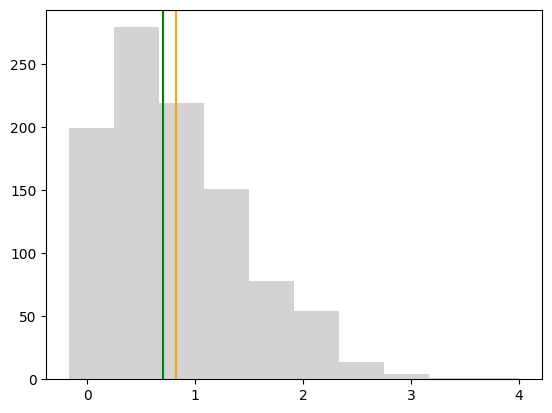

In [28]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
plt.hist(x, color = 'lightgray');

### Quantiles
The median, which divides a distribution in two at its midpoint, is the most well-known example of a quantile:

In [29]:
np.median(x)

0.6987365121323832

In [30]:
np.quantile(x, 0.5)

0.6987365121323832

Generally speaking, quantiles divide up distributions and the most common are:

* Percentiles, 
* Quartiles, and
* Deciles.

__Percentiles__ divide the distribution at any point out of one hundred ("pour cent" is French for "out of a hundred"). For example, if we'd like to identify the threshold for the top 5% of a distribution, we'd cut it at the 95th percentile. Or, for the top 1%, we'd cut at the 99th percentile.

In [31]:
p = np.percentile(x, [95, 99])
p

array([2.06249928, 2.51830108])

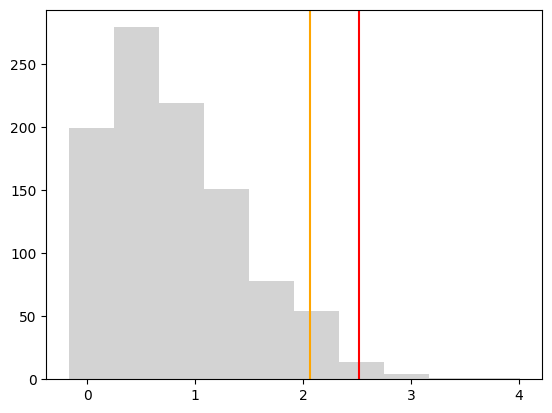

In [32]:
fig, ax = plt.subplots()
plt.axvline(x = p[0], color='orange')
plt.axvline(x = p[1], color='red')
plt.hist(x, color = 'lightgray');

Note that the Numpy `quantile()` method is identical to the `percentile()` method except we pass proportions (ranging from zero to one) into the former and percentages (ranging from zero to 100) into the latter:

In [33]:
np.quantile(x, [.95, .99])

array([2.06249928, 2.51830108])

__Quartiles__, as their name suggests, are quantiles that divide a distribution into quarters by splitting the distribution at the 25th percentile, the median (a.k.a. the 50th percentile), and the 75th percentile: 

In [34]:
q = np.percentile(x, [25, 50, 75])
q

array([0.32494046, 0.69873651, 1.19431522])

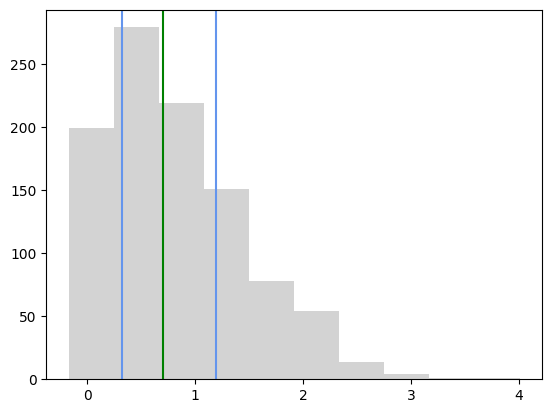

In [35]:
fig, ax = plt.subplots()
plt.axvline(x = q[0], color='cornflowerblue')
plt.axvline(x = q[1], color='green')
plt.axvline(x = q[2], color='cornflowerblue')
plt.hist(x, color = 'lightgray');

__Deciles__ (from Latin *decimus*, meaning "tenth") divide a distribution into ten evenly-sized segments: 

In [36]:
[i for i in range(10, 100, 10)]

[10, 20, 30, 40, 50, 60, 70, 80, 90]

In [37]:
d = np.percentile(x, range(10, 100, 10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

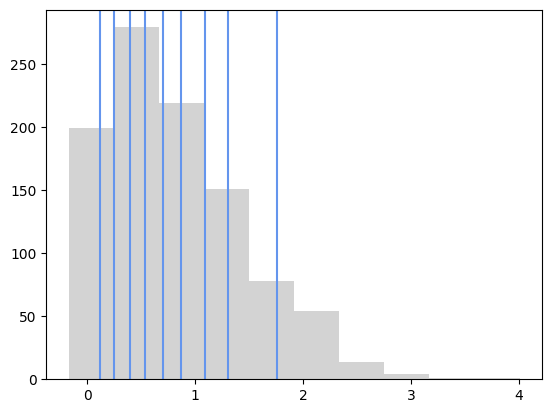

In [38]:
fig, ax = plt.subplots()
[plt.axvline(x = d_i, color='cornflowerblue') for d_i in d]
plt.hist(x, color = 'lightgray');

As examples, we can refer to the bottom 10% as the bottom decile or the first decile, while the top 10% is the top decile or tenth decile.

#### Remember box plot?

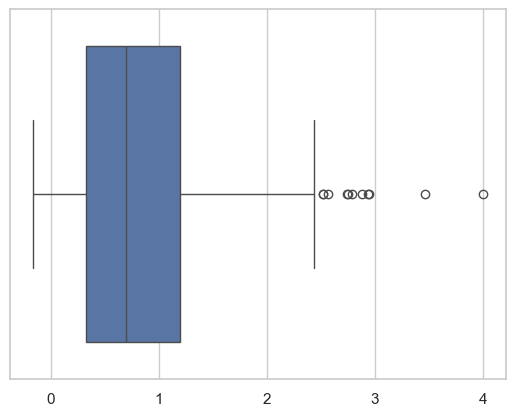

In [39]:
sns.set(style='whitegrid')
sns.boxplot(x=x);

Box edges and median are determined by quartiles:

In [40]:
q

array([0.32494046, 0.69873651, 1.19431522])

Box edges define the **inter-quartile range** (IQR):

In [41]:
r = 1.194 - 0.325
r

0.869

Whisker lengths are determined by furthest data points within $1.5 \times \text{IQR}$ of the box edges.

In this case, the lower whisker could stretch as far down (to the left in the plot) as:

In [42]:
0.325 - 1.5*r

-0.9785000000000001

The lowest value is inside of that so the whisker is plotted where that lowest value is: 

In [43]:
np.min(x)

-0.17083838831568182

The upper whisker could stretch as far up (to the right in the plot) as: 

In [44]:
1.194 + 1.5*r

2.4975

There are several (eleven) values beyond this threshold in the distribution. These values are considered **outliers** and are plotted as individual points:

In [45]:
x.sort()
x[-15:]

array([2.39810074, 2.40295599, 2.41430044, 2.43541111, 2.51827951,
       2.52043572, 2.56177972, 2.74024547, 2.74882884, 2.78877435,
       2.88399304, 2.93368541, 2.94293176, 3.46465001, 4.00641863])

The twelth-highest value, 2.435, is the largest within the upper whisker's maximum reach and so the upper whisker is plotted there.

Useful for examining distributions on their own, box plots are especially helpful for comparing distributions:

In [46]:
iris = sns.load_dataset('iris')
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

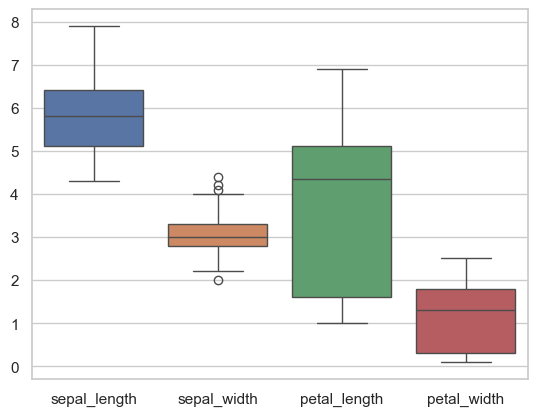

In [47]:
sns.boxplot(data=iris);

In [48]:
tips = sns.load_dataset('tips')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

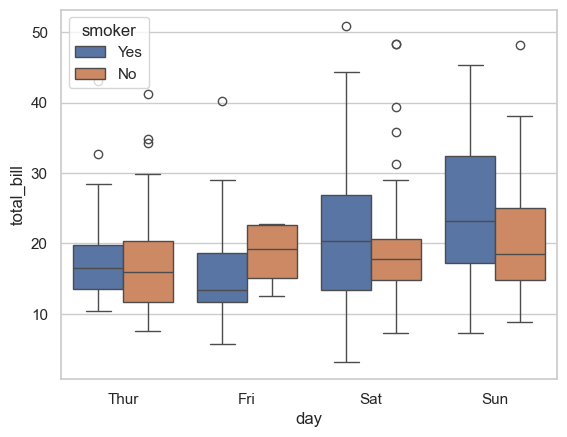

In [49]:
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips);

## Measures of Dispersion
IQR is a relatively rare measure of the dispersion of values around the center of a distribution. The most widely-used are: 

* Variance,
* Standard deviation, and
* Standard error.

### Variance
__Variance__ (denoted with $\sigma^2$) can be written using expected-value notation, but it's easier to understand without it: 
$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

> Note: we should divide by `n-1` with a sample of data, but with the large datasets typical of machine learning, it's a negligible difference. If $n$ were equal to a small number like `8` then it would matter.

> Note 2: the variance of a sample is typically denoted with $s^2$ as opposed to the Greek $\sigma^2$, similar to how $\bar{x}$ denotes the mean of a sample while the Greek $\mu$ is reserved for population mean.

As an example let's calculate the variance of the PDF `x` from earlier: 

In [50]:
xbar = np.mean(x)
xbar

0.8219573880882259

In [51]:
squared_differences = [(x_i - xbar)**2 for x_i in x]
squared_differences[0:10]

[0.9856434536454379,
 0.9170226052916489,
 0.8965181282231266,
 0.8883307031718269,
 0.8733501430824243,
 0.8562478309191935,
 0.8319771034452769,
 0.8310929040089835,
 0.7863402041234238,
 0.7766155393407362]

In [52]:
sigma_squared = sum(squared_differences)/len(x)
sigma_squared

0.39813585982250543

Of course there's a built-in NumPy method: 

In [53]:
np.var(x)

0.3981358598225057

### Standard Deviation
A straightforward derivative of variance is __standard deviation__ (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

In [54]:
sigma = sigma_squared**(1/2)
sigma

0.6309800787841923

In [55]:
np.std(x)

0.6309800787841925

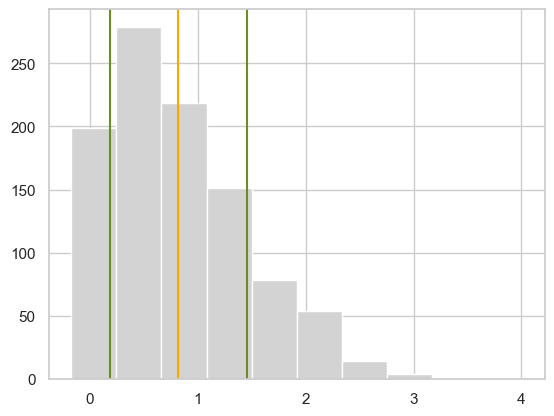

In [56]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
plt.hist(x, color = 'lightgray');

### Standard Error
A further derivation of standard deviation is __standard error__, which is denoted with $ \sigma_{\bar{x}} $:
$$ \sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} $$

In [57]:
sigma/(len(x))**(1/2)

0.019953342071505353

In [58]:
# defaults to 1 degree of freedom (n-1),
# which can be ignored with the larger data sets of ML
st.sem(x)

0.01996332623128527

In [59]:
st.sem(x, ddof=0) # 0 degrees of freedom (n)

0.01995334207150536

Standard error enables us to compare whether the means of two distributions differ _significantly_.

## Measures of Relatedness
### Covariance

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, __covariance__ provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

In [60]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

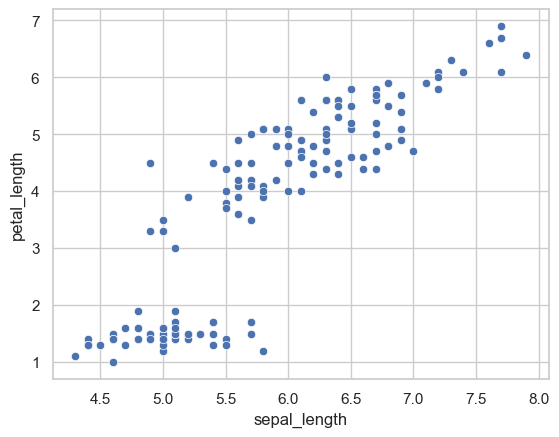

In [61]:
x = iris.sepal_length
y = iris.petal_length

sns.scatterplot(x=x, y=y);

In [62]:
n = len(x)

In [63]:
xbar = sum(x)/n
ybar = sum(y)/n

product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

cov = sum(product)/n
cov

1.2658199999999995

The NumPy `cov()` method returns a __covariance matrix__, which is a $2 \times 2$ matrix because $x$ and $y$ together describe a two-dimensional space: 

In [64]:
np.cov(x, y, ddof=0) # again, defaults to ddof=1

array([[0.68112222, 1.26582   ],
       [1.26582   , 3.09550267]])

The diagonal elements of the covariance matrix represent the variance of $x$ and $y$, respectively: 

In [65]:
np.var(x)

0.6811222222222223

In [66]:
np.var(y)

3.0955026666666665

If $x$ and $y$ are inversely related, their covariance is negative. The less related they are, the closer their covariance is to zero:

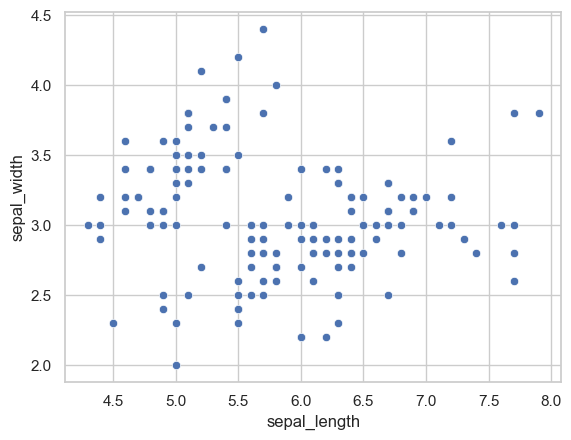

In [67]:
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width);

In [68]:
np.cov(iris.sepal_length, iris.sepal_width, ddof=0)

array([[ 0.68112222, -0.04215111],
       [-0.04215111,  0.18871289]])

### Correlation
A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness. __Correlation__ builds on covariance and overcomes this drawback via rescaling, thereby measuring relatedness exclusively. Correlation is much more common because of this difference. 

The correlation coefficient (developed by Karl Pearson in the XX century though known in the XIX century) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [69]:
cov = -0.04215111
sigma_sq_x = 0.68112222
sigma_sq_y = 0.18871289

sigma_x = sigma_sq_x**(1/2)
sigma_y = sigma_sq_y**(1/2)

r = cov / (sigma_x * sigma_y)
r

-0.11756978087951572

In [70]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=-0.11756978413300206, pvalue=0.15189826071144746)

The second value output of `pearsonr` is a measure of statistical significance.

$\rho$ has a range of -1 to 1, with values closer to zero indicating less correlation: 

In [71]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]

-0.11756978413300206

The closer $\rho$ is to 1 or -1, the stronger the positive or negative correlation, respectively: 

In [72]:
st.pearsonr(iris.sepal_length, iris.petal_length)[0]

0.8717537758865831

> Note: Covariance and correlation only account for linear relationships. Two variables could be non-linearly related to each other and these metrics could come out as zero.

#### Coefficient of Determination
...also known as $r^2$, this is the proportion of variance in one variable explained by another. 

It can range from 0 to 1 and it is simply the square of the Pearson $r$:

In [73]:
rsq = r**2
rsq

0.01382265337605734

In this case, it indicates that 76% of the variance in iris petal length can be explained by sepal length.

For comparison, only 1.4% of the variance in sepal width can be explained by sepal length: 

In [74]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

0.013822654141080705

# Distribution of probability

## Random Variables
A __random variable__ is a variable that can take on different values randomly. On its own, a random variable is just a description of the states that are possible (you can think of these like functions), which must be coupled with a probability distribution that specifies how likely each of these states is.

Random variables can be discrete or continuous. A discrete random variable is one that has a finite or countably infinite number of states. Note that these states are not necessarily the integers; they can also just be named states that are not considered to have any numerical value. For example, gender (male, female, etc.), for which we use an indicator function $\mathbb{I}$ to map non-numeric values to numbers, e.g. male=0, female=1. A continuous random variable is associated with real value.

## Probability Distributions
A __probability distribution__ is a description of how likely a random variable or set of random variables is to take on each of its possible states. The way we describe probability distributions depends on whether the variables are discrete or continuous.

### Discrete Variables: Probability Mass functions
A probability distribution over discrete variables may be described using a __probability mass function (PMF)__. A probability mass function maps from a state of a random variable to the probability of that random variable taking on that state.

For example the roll of a dice is random and a discrete variable means the roll can only have 1, 2, 3, 4, 5 or 6 on a die and no values inbetween.

We denote probability mass functions with $P$, where we denote a __PMF__ equation as $P(X = x)$. Here $x$ can be a number on the dice when $X$ is the event of rolling the dice.

To be a __PMF__ on a random variable $x$, a function $P$ must satisfy the following properties:

- The domain of $P$ must be the set of all possible states of x. In our example above the possible states of x are from 1-6, try using 7 for x and see what value you get.

- $\forall x \in \mathrm{x}, 0 \leq P(x) \leq 1$. An impossible event has probability 0, and no state can be less probable than that. Likewise, an event that is guaranteed to happen has probability 1, and no state can have a greater chance of occurring. If you tried using 7 for our example above, you would have seen the probability of obtaining a 7 would be zero, that is an impossible event because 7 is not in our set.

- $\sum_{x \in \mathrm{x}} P(x) = 1$. Normalized property that prevents from obtaining probabilities greater than one. Meaning if you add all the individual values of our dice probabilities, it should sum to 1 or 100%.

Probability mass functions can act on many variables at the same time. Such a probability distribution over many variables is known as a __joint probability mass function__. $P (\mathrm{x} = x; \mathrm{y} = y) = P(x) P(y)$ denotes the probability that $\mathrm{x} = x$ and $\mathrm{y} = y$ simultaneously.

### Continuous Variables: Probability Density Functions
When working with continuous random variables, we describe probability distributions using a __probability density function (PDF)__.

If I ask you to guess the integer that I am thinking of between 1 to 10, regardless of the number you pick, the probability of each of the options is the same (1/10) because you have 10 options and the probabilities must add up to 1.

But what if I told you to guess the real number I am thinking between 0 and 1. Now this gets tricky, I can be thinking of 0.2, 0.5, 0.0004 and it can go on and on and the possibilities are endless. So we run into problems like how are we going to describe the probability of each option since there are infinite numbers. This is where __PDF__ comes to help, instead of asking the exact probability, we look for a probability that is close to a single number.

To be a probability density function, a function $p$ must satisfy the following properties:

- The domain of $p$ must be the set of all possible states of x

- $\forall x \in \mathrm{x}, p(x) \geq 0$. Note that we do not require $p(x) \leq 1$

- $\int p(x)dx = 1$

A probability density function $p(x)$ does not give the probability of a specific state directly; instead the probability of landing inside an infinitesimal region with volume $\delta x$ is given by $p(x) \delta x$

We can integrate the density function to find the actual probability mass of a set of points. Specifically, the probability that $x$ lies in some set $\mathbb{S}$ is given by the integral of $p(x)$ over that set ($\int_{[a,b]} p(x) dx$)

## Popular distributions
### Uniform
The uniform distribution is about as straightforward as they come. It has constant probabilities across the entire range of values in its domain:

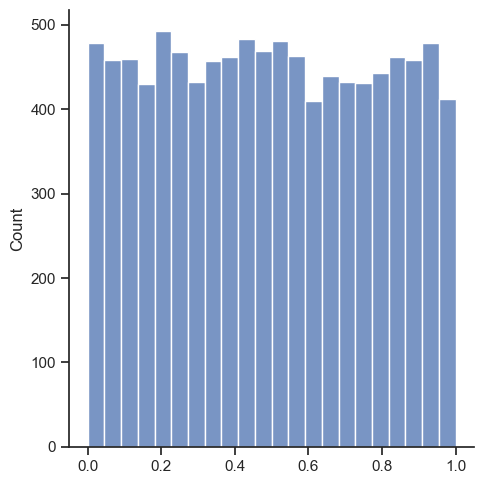

In [75]:
u = np.random.uniform(size=10000)
sns.set_style('ticks')
sns.displot(u);

Real-world examples include: 

* Dice rolling (PMF)
* Card drawing (PMF)
* Model hyperparameters
* Emission of radioactive particles
* Economic demand 
* Analog-to-digital signal quantization errors

### Gaussian
Carl Friedrich Gauss (early XIX century German mathematician and scientist) is the namesake of over a hundred concepts across mathematics, physics, and astronomy. One of those concepts is the Gaussian distribution, also known as the "bell curve" (though several distributions are bell-shaped) or **normal distribution**:

$$\mathcal{N}(x; \mu, \sigma^2) = \sqrt{\frac{1}{2 \pi \sigma^2}} exp \Big(- \frac{1}{2 \sigma^2} (x - \mu)^2 \Big)$$

The two parameters $\mu \in \mathbb{R}$ and $\sigma \in (0, \infty)$ control the normal distribution. The parameter $\mu$ gives the coordinate of the central peak. This is also the mean of the distribution: $\mathbb{E}[\mathrm{x}] = \mu$. The standard deviation of the distribution is given by $\sigma$, and the variance by $\sigma^2$.

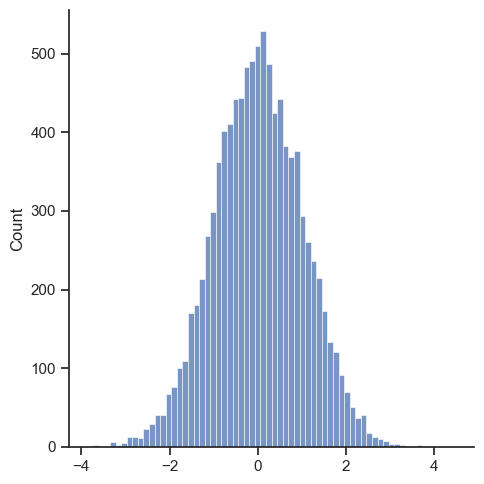

In [76]:
x = np.random.normal(size=10000)
sns.displot(x);

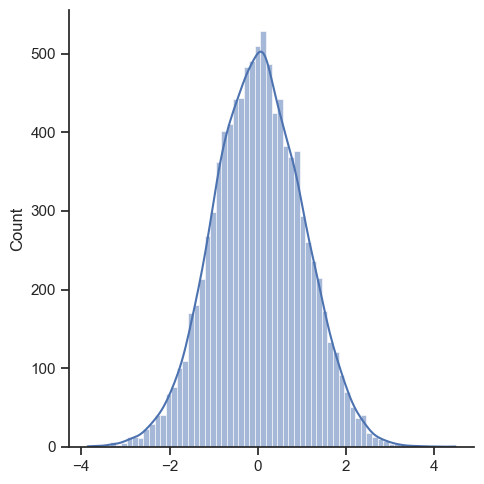

In [77]:
sns.displot(x, kde=True);

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [78]:
np.mean(x)

0.010746657894433886

In [79]:
np.std(x)

1.006376502514602

...it is a __standard normal distribution__ (a.k.a., standard Gaussian distribution). Normal distributions can be denoted with the _math calligraphy_ font as $\mathcal{N}(\mu, \sigma^2)$, thus the standard normal distribution can be denoted as $\mathcal{N}(0, 1)$. 

> Note: $\sigma^2 = \sigma$ in this case because $1^2 = 1$.

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this notebook. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called __central limit theorem__ is a critically important concept.

Real-world examples include: 

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of dice rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores

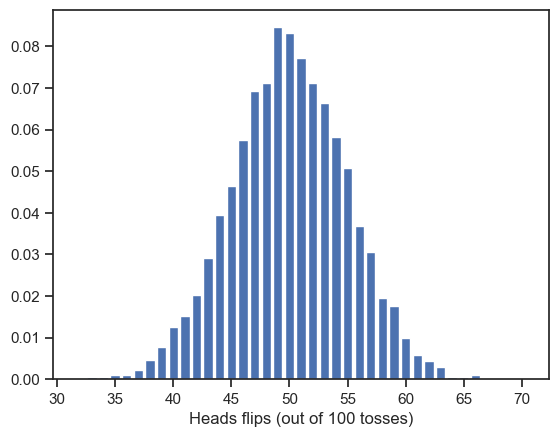

In [80]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_prob = event_count/n_experiments

plt.bar(heads, event_prob)
plt.xlabel('Heads flips (out of 100 tosses)');

#### The Central Limit Theorem
To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [81]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([ 0.32659596, -0.93700698,  2.27851732,  1.21587356,  1.35370984,
       -0.4057365 ,  0.38816803, -0.55343125, -1.6885922 , -2.33595362])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [82]:
np.mean(x_sample)

-0.03578558368006331

Let's define a function for generating __sampling distributions__ of the mean of a given input distribution:

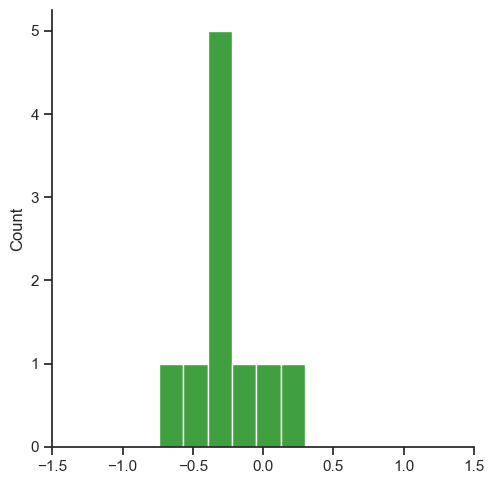

In [83]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

sns.displot(sample_mean_calculator(x, 10, 10), color='green')
plt.xlim(-1.5, 1.5);

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

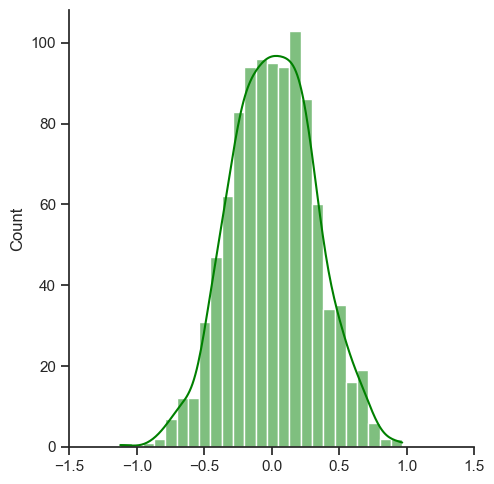

In [84]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
plt.xlim(-1.5, 1.5);

The larger the sample, the tighter the sample means will tend to be around the population mean:

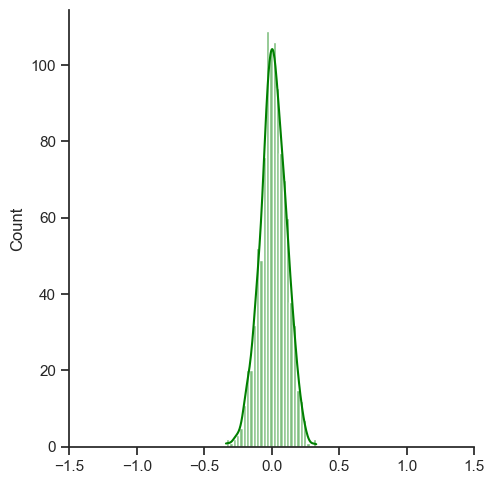

In [85]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
plt.xlim(-1.5, 1.5);

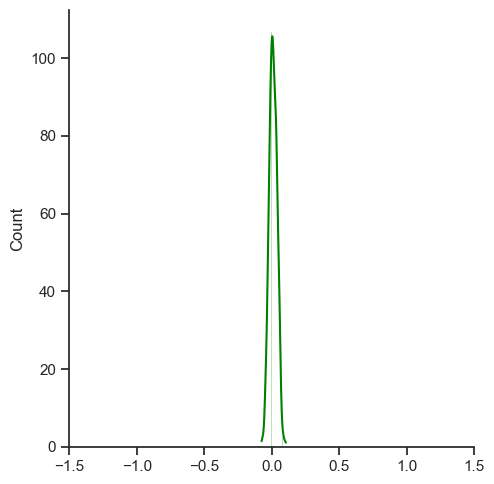

In [86]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
plt.xlim(-1.5, 1.5);

##### Sampling from a skewed distribution

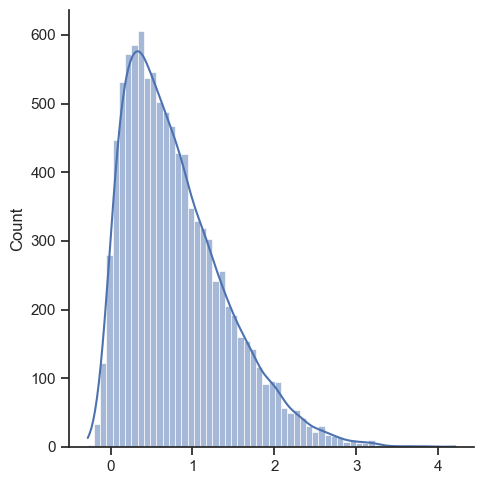

In [87]:
s = st.skewnorm.rvs(10, size=10000)
sns.displot(s, kde=True);

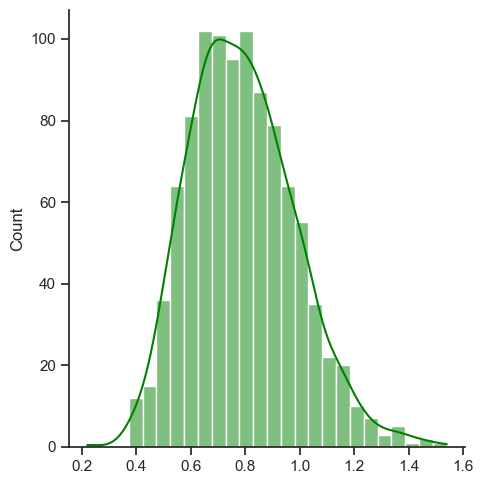

In [88]:
sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True);

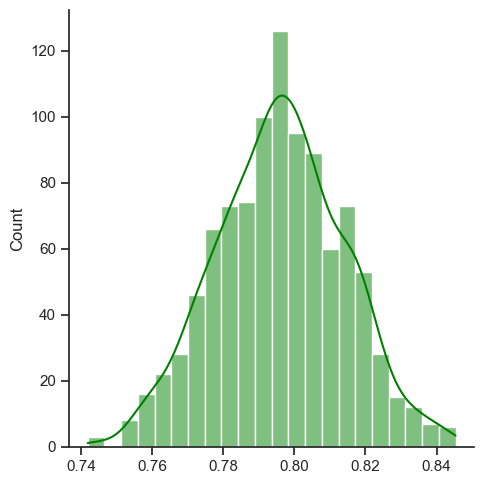

In [89]:
sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True);

##### Sampling from a multimodal distribution

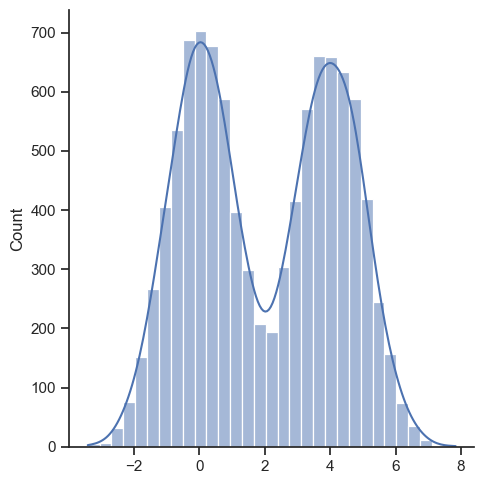

In [90]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))
sns.displot(m, kde=True);

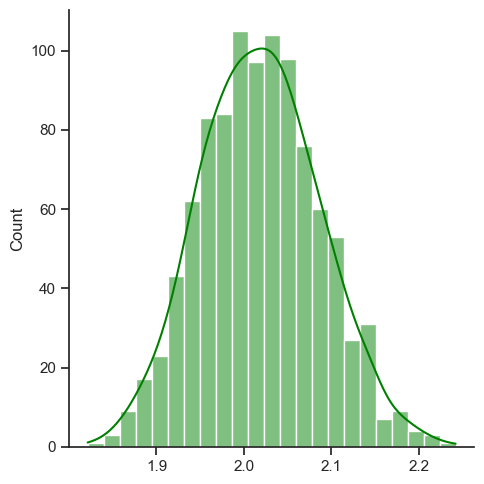

In [91]:
sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True);

##### Sampling from uniform
Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal:

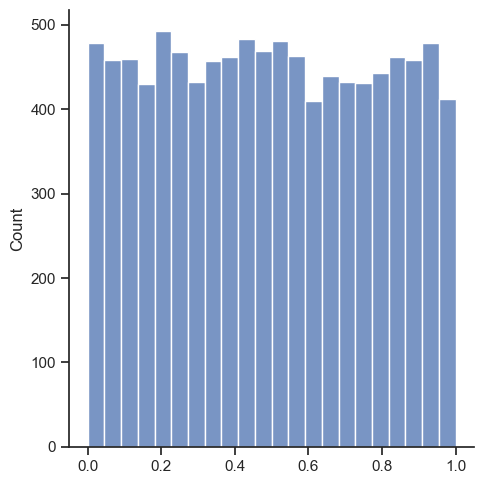

In [92]:
sns.displot(u);

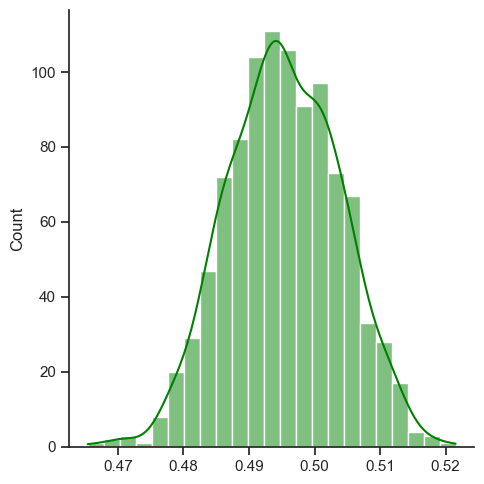

In [93]:
sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True);

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "*t*-test" allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distributions of the populations being tested are, which may be the case more frequently than not.

> Note: despite being associated with such a key concept as the CLT, the name "normal distribution" wasn't originally intended to imply that other distributions are "abnormal". It's a historical quirk related to Gauss describing orthogonal (technically a.k.a. "normal") equations associated with applied uses of the distribution.

You may wonder what the purpose of sampling means is. Well, when we gather data from the real world we are nearly always sampling a subset of all the available data produced by a given random process. And, once we've collected a sample of data, the aspect of it we're often most interested in above all else is its mean.


### Log-Normal Distribution
The natural logarithm of the **log-normal** distribution is normally distributed:

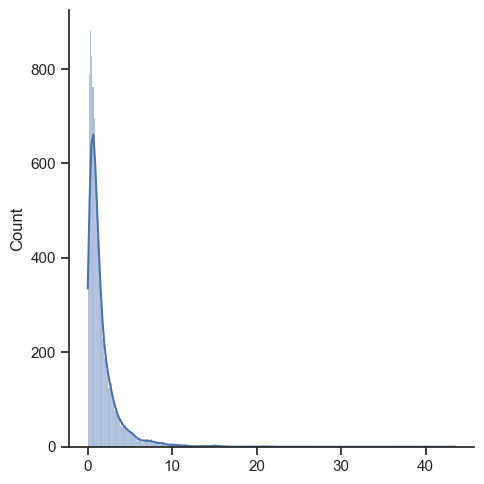

In [94]:
x = np.random.lognormal(size=10000) # defaults to standard normal mu=0, sigma=1
sns.displot(x, kde=True);

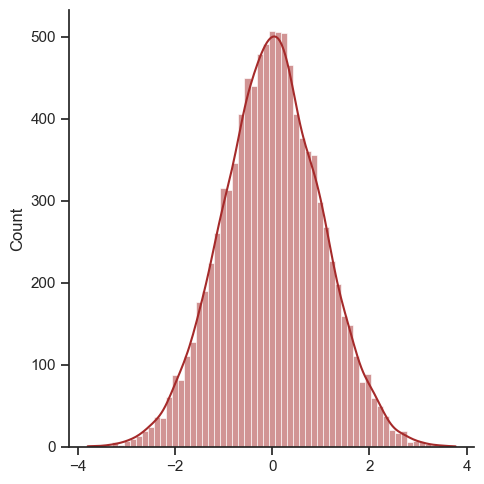

In [95]:
sns.displot(np.log(x), color='brown', kde=True);

Real-world examples: 

* Income
* Length of comments in online forums
* Duration of chess games or Rubik's Cube solves
* Size of publicly-available video files 
* Number of hospitalized cases in an epidemic where public interventions are involved

### Exponential Distribution
Relatively squished up against zero and then decreases exponentially toward higher values. Log-normal distribution, in contrast, could take negative values and both increases and decreases.

In the context of deep learning, we often want to have a probability distribution with a sharp point at $x = 0$. To accomplish this, we can use the __exponential distribution__:

$$p(x; \lambda) = \lambda \mathbf{1}_{x \geq 0} exp(- \lambda x)$$

The exponential distribution uses the indicator function $\mathbf{1}_{x \geq 0}$ to assign probability zero to all negative values of $x$.

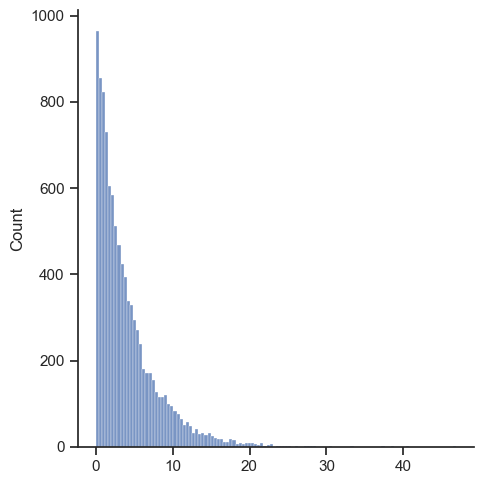

In [96]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one
sns.displot(x);

Its logarithm has a skewed distribution: 

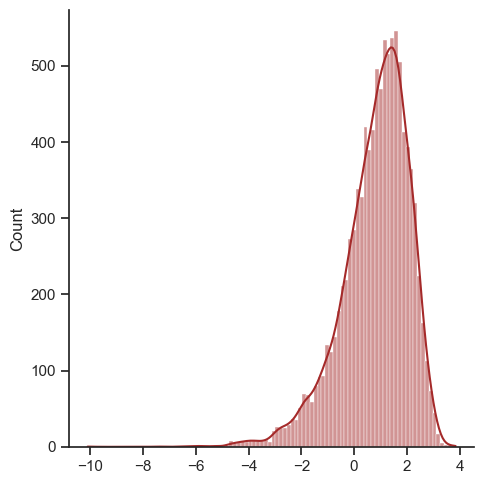

In [97]:
sns.displot(np.log(x), color='brown', kde=True);

Real-world examples: 

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

### Laplace Distribution
Named after Pierre-Simon Laplace, a key figure in the development of Bayesian statistics.

Alternatively referred to as the "double exponential distribution". A closely related probability distribution that allows us to place a sharp peak of probability mass at an arbitrary point $\mu$:

$$\text{Laplace} (x; \mu, \gamma) = \frac{1}{2 \gamma} exp \Big( - \frac{|x - \mu|}{\gamma} \Big)$$

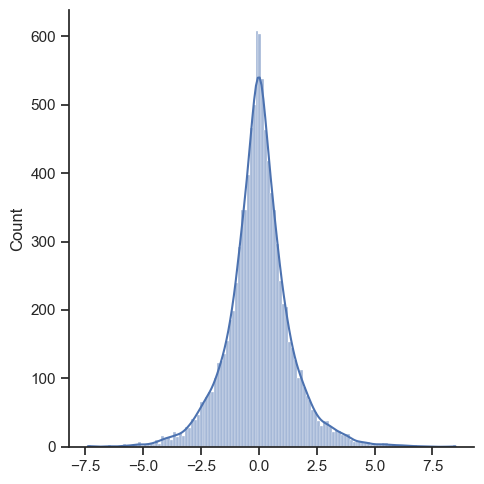

In [98]:
x = np.random.laplace(size=10000)
sns.displot(x, kde=True);

In addition to the scale parameter of the exponential function, it has a location parameter that allows it to be centered on any value: 

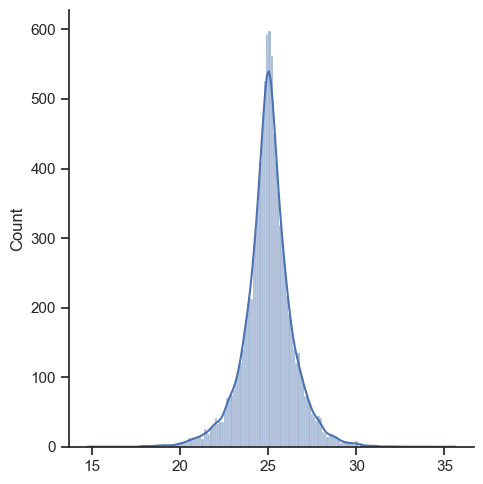

In [99]:
sns.displot(np.random.laplace(loc=25, size=10000), kde=True);

Real-world examples: 

* Extreme weather events, e.g., maximum rainfall in a day
* Many machine learning applications; wherever an acute peak of probability is desired

### Binomial Distribution
All distributions so far have been for continuous variables (PDFs). This one is discrete (PMF). 

We've already been using it for coin flips; it's used for binary (0 or 1) outcome. 

Its parameters are: 

* *n*: number of trials
* *p*: probability of outcome of 1
* *size*: number of experiments with *n* trials each

In [100]:
n = 5
n_experiments = 1000

#### Fair coin (p = 0.5)

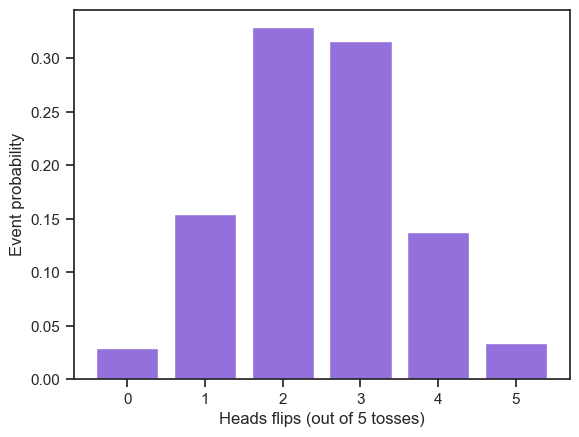

In [101]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_prob = event_count/n_experiments

plt.bar(heads, event_prob, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
plt.ylabel('Event probability');

#### Weighted coin (p = 0.8)

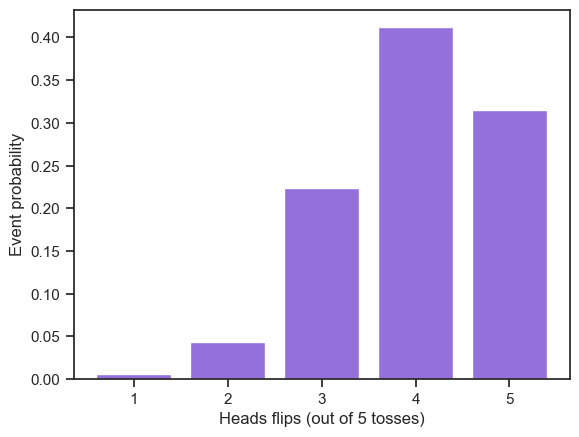

In [102]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_prob = event_count/n_experiments

plt.bar(heads, event_prob, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
plt.ylabel('Event probability');

Technically, binomial distributions are created by sampling $n>1$ "Bernoulli trials". The **Bernoulli** distribution is equivalent to the binomial distribution where $n=1$: 

In [103]:
np.random.binomial(1, 0.5)

1

Real-world examples:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

### Multinomial Distribution
Generalization of the binomial distribution to discrete random variables with more than two possible outcomes, e.g., the roll of a die: 

In [104]:
n = 1000
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

array([176, 150, 178, 183, 171, 142])

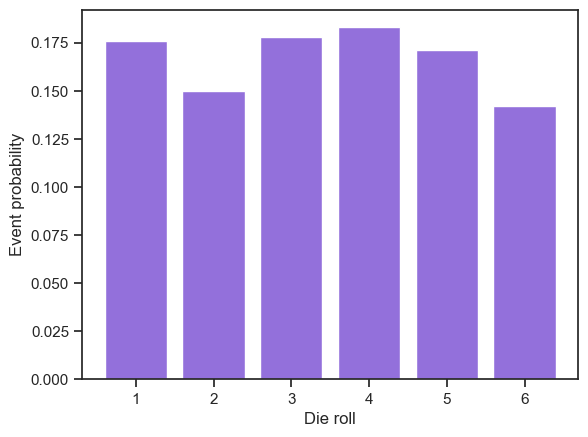

In [105]:
event_prob = rolls/n

plt.bar(range(1, 7), event_prob, color='mediumpurple')
plt.xlabel('Die roll')
plt.ylabel('Event probability');

As in the binomial case, multinomial distributions are created by sampling $n>1$ multinoulli distributions, where the multinoulli distribution is equivalent to the multinomial distribution when $n=1$: 

In [106]:
np.random.multinomial(1, [1/6.]*6)

array([0, 0, 0, 0, 1, 0])

Since multinomial distributions can represent any categorical variable (e.g., burger, hot dog, pizza; 52 playing cards; footbal teams), not just integer values, we can't always calculate an expected value.

### Poisson Distribution
__Poisson__ is a third widely-used distribution for discrete random variables and it's the final distribution we'll cover.

It's named after French mathematician Simeon Denis Poisson and is used for count data, e.g.: 

* Number of cars that drive by in a minute
* Number of guests at restaurant in an evening
* Number of new hires in a month

First argument to NumPy `poisson()` method is $\lambda$, which must be greater than zero and guides peak of probability distribution. E.g., sampling from Poisson with $\lambda=5$ will tend to draw samples near 5.

In [107]:
lam=5

Second argument is number of samples to draw: 

In [108]:
n=1000

In [109]:
samples = np.random.poisson(lam, n)
samples[0:20]

array([4, 3, 2, 2, 6, 6, 6, 5, 5, 3, 6, 4, 5, 6, 3, 6, 7, 6, 5, 4])

In [110]:
x, x_count = np.unique(samples, return_counts=True)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [111]:
x_count

array([  6,  43,  82, 146, 166, 162, 141, 132,  54,  33,  20,   8,   5,
         2])

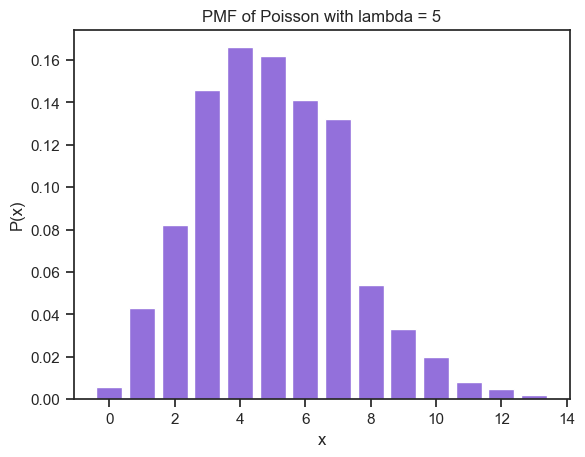

In [112]:
Px = x_count/n

plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
plt.ylabel('P(x)');

### Mixture Distributions
One common way of combining simpler distributions to define probability distribution is to construct a __mixture distribution__. A mixture distribution is made up of several component distributions. On each trial, the choice of which component distribution should generate the sample is determined by sampling a component identity from a multinoulli distribution:

$$P(\mathrm{x}) = \displaystyle\sum_i P(c = i) \ P(\mathrm{x} | c = i)$$

where $P(c)$ is the multinoulli distribution over component identities.

The mixture model allows us to briefly glimpse a concept that will be of important later -- the __latent variable__. A latent variable is a random variable that we cannot observe directly. Latent variables may be related to x through the joint distribution.

**Gaussian mixture model** (GMM) is common type of mixture distribution, wherein all of the component distributions $p(\mathrm{x} | c =i)$ are Gaussians. Each component has a separate parametrized mean $\mu^{(i)}$ and covariance $\Sigma^{(i)}$. As with a single Gaussian distribution, the mixture of Gaussians might constrain the covariance matrix for each component to be diagonal or isotropic. A Gaussian mixture model is a __universal approximator__ of densities, in the sense that any smooth density can be approximated with any specific nonzero amount of error by a Gaussian mixture model with enough components.

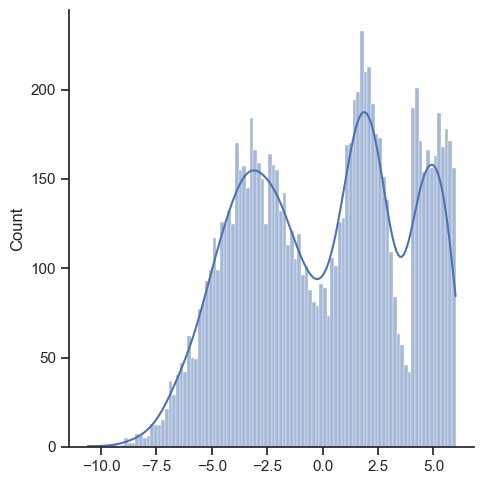

In [113]:
distributions = [
    {"type": np.random.normal, "kwargs": {"loc": -3, "scale": 2}},
    {"type": np.random.uniform, "kwargs": {"low": 4, "high": 6}},
    {"type": np.random.normal, "kwargs": {"loc": 2, "scale": 1}},
]

coefficients = np.array([0.5, 0.2, 0.3])
coefficients /= coefficients.sum()      # in case these did not add up to 1
sample_size = 10000

num_distr = len(distributions)
data = np.zeros((sample_size, num_distr))
for idx, distr in enumerate(distributions):
    data[:, idx] = distr["type"](size=(sample_size,), **distr["kwargs"])

random_idx = np.random.choice(np.arange(num_distr), size=(sample_size,), p=coefficients)
sample = data[np.arange(sample_size), random_idx]
sns.displot(sample, bins=100, kde=True);

# Useful Properties of Common Functions
## Logistic Sigmoid

$$\sigma(x) = \frac{1}{1 + exp(-x)}$$

The logistic sigmoid is commonly used to produce the $\phi$ parameter of a Bernoulli distribution because its range is (0, 1), which lies within the valid range of values for the $\phi$ parameter. The sigmoid function saturates when its argument is very positive or very negative, meaning that the function becomes very flat and insensitive to small changes in its input.


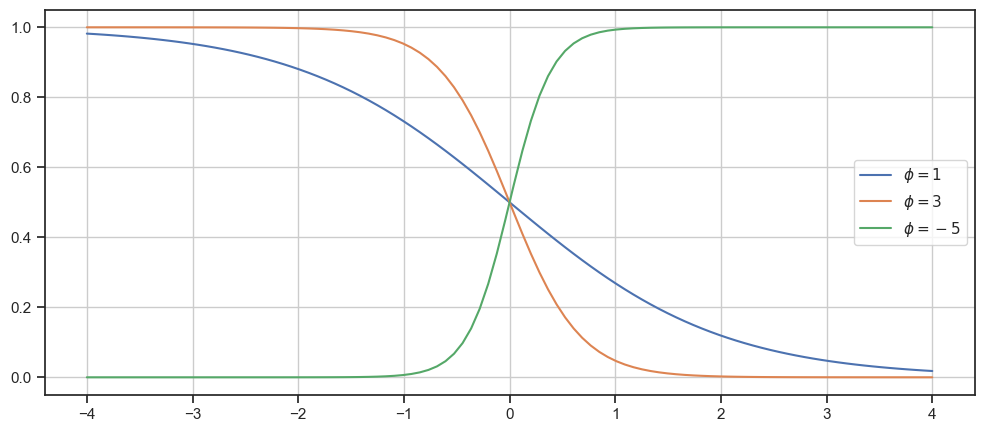

In [114]:
def logistic(x, phi):
    return 1.0 / (1.0 + np.exp(phi * x))

# create a range of values starting from -4 to 4 with incremants (= stop - start / num - 1)
x_vals = np.linspace(start=-4., stop=4., num=100)

# Create three logistic functions to see the effect of the parameter phi
log_phi_1 = logistic(x_vals, 1.)
log_phi_3 = logistic(x_vals, 3.)
log_phi_5 = logistic(x_vals, -5.)

# Plot of the logistic function
plt.figure(figsize = (12, 5))
plt.plot(x_vals, log_phi_1, label=r"$\phi = 1$")
plt.plot(x_vals, log_phi_3, label=r"$\phi = 3$")
plt.plot(x_vals, log_phi_5, label=r"$\phi = -5$")
plt.legend()
plt.grid()

## Softplus Function

$$\zeta (x) = log \ (1 + exp(x))$$

The softplus function can be useful for producing the $\beta$ or $\sigma$ parameter of a normal distribution because its range is (0, $\infty$). It also arises commonly when manipulating expressions involving sigmoids. The name of the softplus function comes from the fact that it is a smoothed, or “softened,” version of $x^+ = max(0, x)$

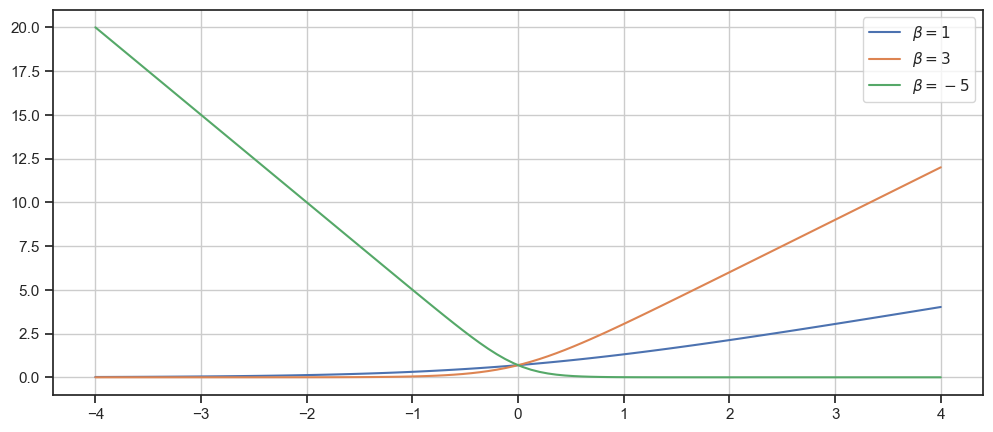

In [115]:
def softplus(x, beta):
    return np.log(1 + np.exp(beta * x))

# create a range of values starting from -4 to 4 with incremants (= stop - start / num - 1)
x_vals = np.linspace(start=-4., stop=4., num=100)

# Create three softplus functions to see the effect of the parameter beta
log_beta_1 = softplus(x_vals, 1.)
log_beta_3 = softplus(x_vals, 3.)
log_beta_5 = softplus(x_vals, -5.)

# Plot of the softplu function
plt.figure(figsize = (12, 5))
plt.plot(x_vals, log_beta_1, label=r"$\beta = 1$")
plt.plot(x_vals, log_beta_3, label=r"$\beta = 3$")
plt.plot(x_vals, log_beta_5, label=r"$\beta = -5$")
plt.legend()
plt.grid()

The following are some useful properties if you wish to memorize:

<img src="images/sig-soft.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="25%">

The function $\sigma^{-1}x$ is called the __logit__ in statistics, but this term is rarely used in machine learning.

# Bayes' Rule
__Bayes' rule__ is a useful tool that computes the conditional probability $P( x | y)$ from $P(y | x)$. Here

- $P( x | y)$ is called the _posterior_; this is what we are trying to estimate,
- $P(y | x)$ is called the _likelihood_; this is the probability of observing the new evidence, given our initial hypothesis,
- $P(x)$ is called the _prior_; this is the probability of our hypothesis without any additional prior information,
- $P(y)$ is called the _marginal likelihood_; this is the total probability of observing the evidence.

The Bayes' rule can be summed up as:

$$P(x | y) = \frac{P(x) \ P(y | x)}{P(y)}$$

Even though $P(y)$ appears in the formula, it is usually feasible to compute $P(y) = \sum_x P(y | x) P(x)$, so we do not need to begin with knowledge of $P(y)$.

For example, there are 2 cookie jars:

* Jar 1 has 30 vanilla cookies and 10 chocolate cookies
* Jar 2 has 20 vanilla cookies and 20 chocolate cookies

You randomly pick one cookie from one randomly chosen jar. It is vanilla. What is the probability it was from Jar 1?

So we are looking for $P(\text{Jar 1} | \text{Vanilla})$.

In [116]:
# probability of picking between Jar 1 and 2: The Prior probability
p_jar_1 = 1/2

# Vanilla / total cookies: The likelihood
p_vanilla_given_jar_1 = 30/(30+10)

# total vanilla cookies / Total cookies: The marginal likelihood
p_vanilla = (30+20) / (30+10 + 20+20)

# Bayes' rule
p_jar_1_given_vanilla = (p_jar_1 * p_vanilla_given_jar_1) / p_vanilla

print('P(Jar 1 | Vanilla) = {}'.format(p_jar_1_given_vanilla))

P(Jar 1 | Vanilla) = 0.6


# Structured Probabilistic Models

Machine learning algorithms often involve probability distributions over a very large number of random variables. Often, these probability distributions involve direct interactions between relatively few variables. Using a single function to describe the entire joint probability distribution can be very inefficient (both computationally and statistically).

Insted of using a single function to represent a probabiility distribuiton, we can split a probability distribution into many factors that we multiply together. These factorizations can greatly reduce the number of parameters needed to describe the distribution.

We can describe these kinds of factorizations using graphs. Here, we use the word "graph" in the sense of graph theory: a set of vertices that may be connected to each other with edges. When we represent the factorization of a probability distribution with a graph, we call it a __structured probabilistic model__, or __graphical model__.


There are two main kinds of structured probabilistic models: directed and undirected. Both kinds of graphical models use a graph $\mathcal{G}$ in which each node in the graph corresponds to a random variable, and an edge connecting two random variables means that the probability distribution is able to represent direct interactions between those two random variables.

__Directed__ models or __Directed Acyclic Graphs (DAG)__ also known as __Bayesian Network__ use graphs with directed edges, these edges give _casuality_ relationships and they represent factorizations into conditional probability distributions. Specifically, a directed model contains one factor for every random variable $\mathrm{x}_i$ in the distribution, and that factor consists of the conditional distribution over $\mathrm{x}_i$ given the parents of $\mathrm{x}_i$ denoted $Pa_{\mathcal{G}}(\mathrm{x}_i)$

$$p(\mathrm{x}) = \prod_i p(\mathrm{x}_i \ | \ Pa_{\mathcal{G}}(\mathrm{x}_i))$$

<img src="images/dag.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="25%">

This graph corresponds to probability distributions that can be factored as:

$p(a, b, c, d, e) = p(a) p(b | a) p(c | a, b) p(d | b) p(e | c)$

An application of directed graph is in finding who is related to who, for example:

<img src="images/drwho.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="25%">

You can also think of social networks, like twitter, if you put all your followers and people who you follow, what you get would be a directed graph.

__Undirected__ models or __Undirected Graphical Models (UGM)__ also known as __Markov Random Fields__ use graphs with undirected edges, these edges give _correlations_ between variables and they represent factorization into a set of functionals unlike in the directed case, these functions are usually not probability distributions of any kind. Any set of nodes that are all connected to each other in $\mathcal{G}$ is called a clique. Each clique $\mathcal{C}^{(i)}$ in an undirected model is associated with a factor $\phi^{(i)} (\mathcal{C^(i)})$. These factors are just functions, not probability distributions. The output of each factor must be non-negative, but there is no constraint that the factor must sum or integrate to 1 like a probability distribution.

The probability of a configuration of random variables is proportional to the product of all these factors and since there is no guarantee that this product will sum to 1, we divide by a normalizing constant $Z$, defined to be the sum or integral over all states of the product of the $\phi$ functions, in order to obtain a normalized probability distribution:

$$p(x) = \frac{1}{Z} \prod_i \phi^{(i)} (\mathcal{C}^{(i)})$$

<img src="images/ugm.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="25%">

This graph corresponds to probability distributions that can be factored as:

$p(a, b, c, d, e) = \frac{1}{Z} \phi^{(1)} (a, b, c) \phi^{(2)} (b, d) \phi^{(3)} (c, e)$

An application of undirected graph is in social network analysis, like facebook:

<img src="images/ugmfb.png" style="background:white; border:none; box-shadow:none; display:inline; margin:0; vertical-align:middle;" width="25%">

Some of the other example include, protein interaction networks, modeling the game Go and information retrieval.

Keep in mind that being directed or undirected is not a property of a probability distribution, it is a property of a particular description of a probability distribution, but any probability distribution may be described in both ways.